In [4]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python matplotlib torch torchvision


  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-neoqj0s3
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-neoqj0s3
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=e363e6d72cb09c4dba940c672e4d15c17f81298184ac590df81fcc7201d2d7e5
  Stored in directory: /tmp/pip-ephem-wheel-cache-g004m3rk/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from google.colab import files
uploaded = files.upload()  # Upload your image and sam_vit_b.pth


Saving dog.jpg to dog (1).jpg


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# Load image
image_path = list(uploaded.keys())[0]  # pick first file
image_bgr = cv2.imread(image_path)
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Load SAM
model_type = "vit_b"
checkpoint_path = "/content/drive/MyDrive/sam_vit_b_01ec64.pth"  # rename if needed
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
sam.to(device)

predictor = SamPredictor(sam)
predictor.set_image(image)


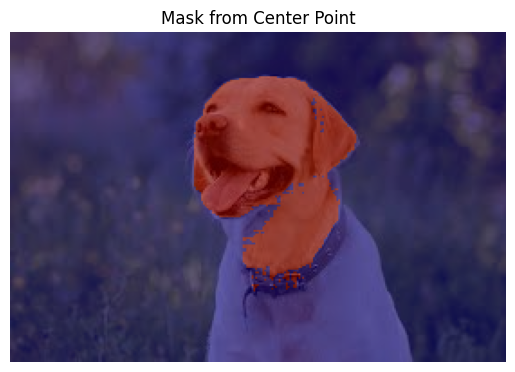

In [8]:

x_center=128
y_center=44

# SAM needs numpy arrays
input_point = np.array([[x_center, y_center]])
input_label = np.array([1])  # 1 = foreground

# Predict mask
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

# Show result
plt.imshow(image)
plt.imshow(masks[0], alpha=0.6, cmap='jet')
plt.title("Mask from Center Point")
plt.axis('off')
plt.show()


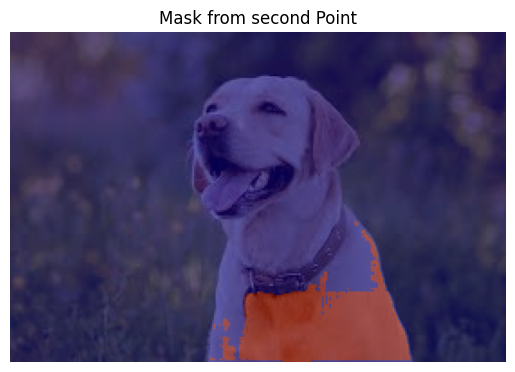

In [9]:

x_center=164
y_center=153

# SAM needs numpy arrays
input_point = np.array([[x_center, y_center]])
input_label = np.array([1])  # 1 = foreground

# Predict mask
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

# Show result
plt.imshow(image)
plt.imshow(masks[0], alpha=0.6, cmap='jet')
plt.title("Mask from second Point")
plt.axis('off')
plt.show()
